In [18]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from normalMode import Chinook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [19]:
f = 23
sd = 36
c_w = 1500
rho_w = 1000
d = 100
layer_w = (0, c_w, rho_w, 0)
layer_pr = (d, 0, 0, 0)
world = acousticEnv()
world.addProfile([layer_w, layer_pr], 0)

In [20]:
zPlot = np.r_[0:150:100j]
rPlot = np.r_[10:3000:200j]

In [21]:
nm_model = Chinook(f, world)
# nm_model.calculateModes_shooting()

In [22]:
print(nm_model.countNumberModes())

3


In [23]:
nm_model.calculateModes_shooting()

In [24]:
p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)

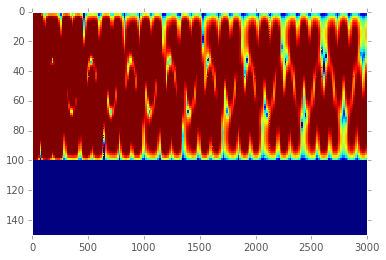

In [25]:
R_nm, Z = np.meshgrid(p_nm.index, p_nm.columns)
TL_nm = 20 * np.log10(np.abs(p_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_nm))
plt.clim(-80, -50)
plt.xlim(0, np.max(rPlot))
plt.ylim(150,0)
plt.show()

In [26]:
vz_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)

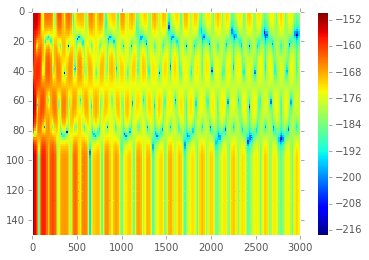

In [27]:
R_nm, Z = np.meshgrid(vz_nm.index, vz_nm.columns)
TL_vel_nm = 20 * np.log10(np.abs(vz_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_vel_nm))
# plt.clim(-190, -140)
plt.xlim(0, np.max(rPlot))
plt.ylim(150,0)
plt.colorbar()
plt.show()

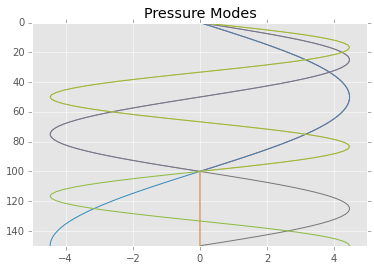

In [29]:
profile = world.getProfile(0)
for i in nm_model.modes_p:
    plt.plot(i.getModeatZ(zPlot), zPlot)
#     print(np.trapz(i.getModeatZ(zPlot) ** 2 / rho_w, zPlot))
    kz = np.sqrt((i.omega / c_w) ** 2 - i.kr ** 2)
    a_mode = np.sin(zPlot * kz)
    mode_norm = np.trapz(a_mode[zPlot < d] ** 2 /\
                         rho_w, zPlot[zPlot < d])
    plt.plot(a_mode / np.sqrt(mode_norm), zPlot)
#     k
_ = plt.ylim(np.max(zPlot), 0)
_ = plt.title('Pressure Modes')

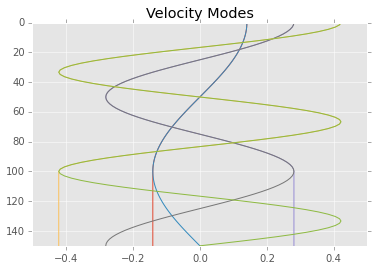

In [30]:
for i in nm_model.modes_v:
    plt.plot(i.getModeatZ(zPlot), zPlot)
    
    kz = np.sqrt((i.omega / c_w) ** 2 - i.kr ** 2)
    a_mode = kz * np.cos(zPlot * kz)
    mode_norm = np.trapz(np.sin(kz * zPlot[zPlot < d]) ** 2 /\
                         rho_w, zPlot[zPlot < d])
    
    plt.plot(a_mode / np.sqrt(mode_norm), zPlot)
_ = plt.ylim(np.max(zPlot), 0)
_ = plt.title('Velocity Modes')